In [64]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

In [65]:
num_agents = 200
num_iterations = 100
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [66]:
default_params = [0.0020000000949949026, 0.003000000026077032, 0.15000000596046448, 0.25]
default_metrics = utils.get_metrics(uproot.open('default.root'), 0)

In [67]:
# metrics = []
# for i in range(num_iterations):
#     file = uproot.open('history/validation/iteration' + str(i) + '.root')
#     temp = []
#     for j in range(num_agents):
#         fitness = utils.get_metrics(file, j)
#         temp.append(fitness)
#     metrics.append(np.transpose(temp))
    
#     file.close()

In [68]:
metrics = [pd.read_csv("history/particles/iteration" + str(i) + ".csv", header=None, usecols=[4, 5]).transpose().to_numpy()
                          for i in range(num_iterations)]

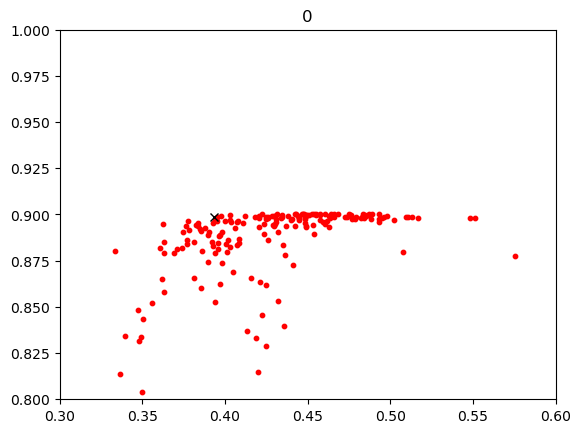

In [110]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.3, 0.6)
    ax.set_ylim(0.8, 1)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=1000, frames=range(num_iterations))
ani.save('history/metrics.gif', writer='pillow')


In [70]:
params = [np.transpose(pd.read_csv("history/particles/iteration" + str(i) + ".csv", header=None, usecols=[0, 1, 2, 3]).to_numpy())
                          for i in range(num_iterations)]
# params = []
# for i in range(num_iterations):
#     temp = utils.read_csv("history/parameters/iteration" + str(i) + ".csv")
#     params.append(np.transpose(temp))

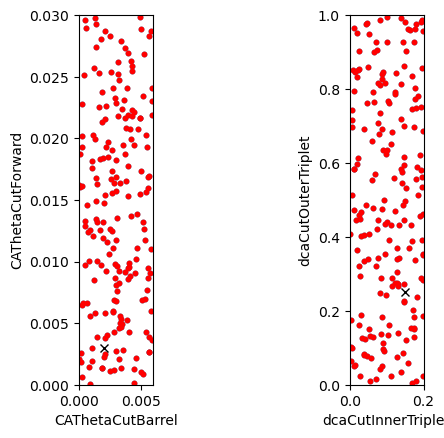

In [71]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(121, aspect='equal')
    ax.set_xlim(params_lb[0], params_ub[0])
    ax.set_ylim(params_lb[1], params_ub[1])
    s = ax.scatter(params[0][0], params[0][1], s=10)
    s = ax.scatter(params[i][0], params[i][1], c="red", s=10)
    # s = ax.scatter(params[num_iterations - 1][0], params[num_iterations - 1][1], c="green", s=10)
    s = ax.plot(default_params[0], default_params[1], c="black", marker="x")
    ax.set_xlabel(params_names[0])
    ax.set_ylabel(params_names[1])
    ax = fig.add_subplot(122, aspect='equal')
    ax.set_xlim(params_lb[2], params_ub[2])
    ax.set_ylim(params_lb[3], params_ub[3])
    s = ax.scatter(params[0][2], params[0][3], s=10)
    s = ax.scatter(params[i][2], params[i][3], c="red", s=10)
    # s = ax.scatter(params[num_iterations - 1][2], params[num_iterations - 1][3], c="green", s=10)
    s = ax.plot(default_params[2], default_params[3], c="black", marker="x")
    ax.set_xlabel(params_names[2])
    ax.set_ylabel(params_names[3])

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/params.gif', writer='pillow')

In [114]:
def get_pareto_front():
        pareto_front = []
        particles = []
        for i in range(num_iterations):
            if i in [46, 52, 57]:
                continue
            particles.append(utils.read_csv('history/particles/iteration' + str(i) + '.csv'))
        particles = np.concatenate(particles)
                                
        for particle in particles:
            dominated = False
            for other_particle in particles:
                if all(particle[4:] == other_particle[4:]):
                    continue
                if all(particle[4:] >= other_particle[4:]):
                    dominated = True
                    break
            if not dominated:
                pareto_front.append(particle)
        utils.write_csv('history/pareto_front.csv', pareto_front)
        return np.array(pareto_front)

In [115]:
pareto_front = get_pareto_front()

In [116]:
# pareto_front = utils.read_csv('history/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, 4].argsort()]
pareto_x = [particle[5] for particle in pareto_front]
pareto_y = [1 - particle[4] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [117]:
len(pareto_front)

114

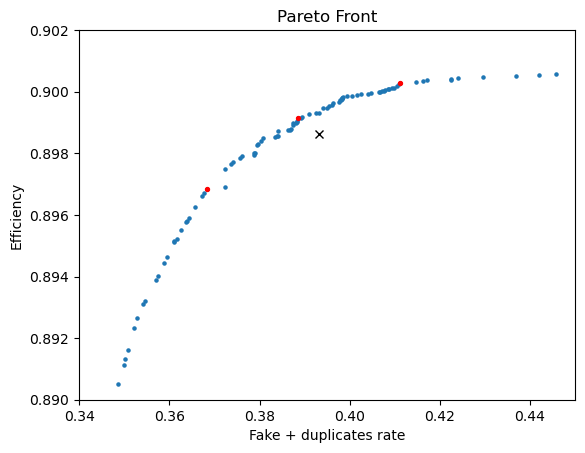

In [132]:
point1 = pareto_front[10]
point2 = pareto_front[45]
point3 = pareto_front[71]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[5], point2[5], point3[5]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.34, 0.45)
plt.ylim(0.89, 0.902)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.show()

In [133]:
print([point1[i] for i in range(4)])
print([point2[i] for i in range(4)])
print([point3[i] for i in range(4)])

[0.001993812566032694, 0.003636130015568504, 0.14538143286932792, 0.5936423808991382]
[0.0017229635041885298, 0.0043167219145539455, 0.11441890651719293, 0.3515064908205071]
[0.0012464775852048856, 0.0024085000226165935, 0.10123634719495359, 0.3309019634448054]


In [134]:
print(point1)
print(point2)
print(point3)

[0.00199381 0.00363613 0.14538143 0.59364238 0.09972175 0.41106719]
[0.00172296 0.00431672 0.11441891 0.35150649 0.10086455 0.38852552]
[0.00124648 0.0024085  0.10123635 0.33090196 0.10316672 0.36834441]
